In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>idées:</b>
 - Ajouter column jour de la semaine pour connaître le jour de la semaine en enlevant l'heure.
 - Ajouter le jour du mois.... ( voir la plage de date des envoies de mail).
 - Ajouter column horaire pour connaître l'horaire indépendamment du jour.
 - Ajouter la longueur du contenu.
 - Regarder le tout premier mail envoyé et le tout dernier.
 - Regarder qui sont ceux qui ont envoyé le plus de mail.
 - Regarder qui sont ceux qui on reçu le plus de mail.
 - regarder la longueur des contenus. (indépendamment de toute column, en fonction des users, dates, horaires, (et categorie?)).
 - analyser cc.

<b> Choses à faire: </b>
   - Convertir toutes data (1 column) ---> (n column).
   - Catégorie: éliminer celles ou 100% des rows sont nulles pour la column.
   - Catégorie: (pas 100% nulle): regarder le nombre et afficher les valeurs.
   - Ajouter une column longueur du contenu.

In [2]:
data = pd.read_csv('/Users/lucas/Desktop/Polytech/IG4/S7/projet_DS/mail.csv',dtype={'To':'string', 'Subject':'string', 'X-From':'string',
       'X-To':'string', 'X-cc':'string', 'X-bcc':'string', 'X-Folder':'string', 'X-Origin':'string', 'X-FileName':'string',
       'content':'string', 'user':'string', 'Cat_1_level_1':'string', 'Cat_1_level_2':'string', 'Cat_1_weight':'string',
       'Cat_2_level_1':'string', 'Cat_2_level_2':'string', 'Cat_2_weight':'string', 'Cat_3_level_1':'string',
       'Cat_3_level_2':'string', 'Cat_3_weight':'string', 'Cat_4_level_1':'string', 'Cat_4_level_2':'string',
       'Cat_4_weight':'string', 'Cat_5_level_1':'string', 'Cat_5_level_2':'string', 'Cat_5_weight':'string',
       'Cat_6_level_1':'string', 'Cat_6_level_2':'string', 'Cat_6_weight':'string', 'Cat_7_level_1':'string',
       'Cat_7_level_2':'string', 'Cat_7_weight':'string', 'Cat_8_level_1':'string', 'Cat_8_level_2':'string',
       'Cat_8_weight':'string', 'Cat_9_level_1':'string', 'Cat_9_level_2':'string', 'Cat_9_weight':'string',
       'Cat_10_level_1':'string', 'Cat_10_level_2':'string', 'Cat_10_weight':'string', 'Cat_11_level_1':'string',
       'Cat_11_level_2':'string', 'Cat_11_weight':'string', 'Cat_12_level_1':'string', 'Cat_12_level_2':'string',
       'Cat_12_weight':'string'})

In [3]:
data.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),<NA>,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,Phillip K Allen,Leah Van Arsdall,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),<NA>,Phillip K Allen,Randall L Gay,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Phillip K Allen,Greg Piper,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False


<br>
<b>Check for null values</b>

In [4]:
data.isnull().sum()

Unnamed: 0             0
Message-ID             0
Date                   0
From                   0
To                  5001
Subject             5364
X-From                 6
X-To                2600
X-cc               78253
X-bcc              99966
X-Folder               6
X-Origin               6
X-FileName           729
content              402
user                   0
Cat_1_level_1      99790
Cat_1_level_2      99790
Cat_1_weight       99790
Cat_2_level_1      99800
Cat_2_level_2      99800
Cat_2_weight       99800
Cat_3_level_1      99834
Cat_3_level_2      99834
Cat_3_weight       99834
Cat_4_level_1      99896
Cat_4_level_2      99896
Cat_4_weight       99896
Cat_5_level_1      99943
Cat_5_level_2      99943
Cat_5_weight       99943
Cat_6_level_1      99979
Cat_6_level_2      99979
Cat_6_weight       99979
Cat_7_level_1      99990
Cat_7_level_2      99990
Cat_7_weight       99990
Cat_8_level_1      99998
Cat_8_level_2      99998
Cat_8_weight       99998
Cat_9_level_1      99999


<b> Ok, Il y a beaucoup de valeurs manquantes:</b>
   - Cat_12_weight, Cat_12_level_2, Cat_11_weight, Cat_11_level_2, Cat_11_level_1 ont toutes les valeurs nulles : on peut donc les enlever.


In [5]:
data = data.drop(['Cat_12_weight','Cat_12_level_1', 'Cat_12_level_2', 'Cat_11_weight', 'Cat_11_level_2', 'Cat_11_level_1'], axis=1)

<br>
<b>On va regarder les valeurs différentes possibles en fonction des variables.</b>

In [6]:
def look_values(df, column):
    return('Unique value of {}: {}'.format(column, len(df[column].unique())))
    

In [7]:
columns = ['Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
        'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'labeled']
for column in columns:
    print(look_values(data,column))

Unique value of Date: 52029
Unique value of From: 5537
Unique value of To: 15648
Unique value of Subject: 38400
Unique value of X-From: 7217
Unique value of X-To: 19733
Unique value of X-cc: 7837
Unique value of X-bcc: 30
Unique value of X-Folder: 1153
Unique value of X-Origin: 56
Unique value of X-FileName: 93
Unique value of user: 30
Unique value of Cat_1_level_1: 2
Unique value of Cat_1_level_2: 9
Unique value of Cat_1_weight: 3
Unique value of Cat_2_level_1: 5
Unique value of Cat_2_level_2: 14
Unique value of Cat_2_weight: 4
Unique value of Cat_3_level_1: 4
Unique value of Cat_3_level_2: 15
Unique value of Cat_3_weight: 3
Unique value of Cat_4_level_1: 4
Unique value of Cat_4_level_2: 14
Unique value of Cat_4_weight: 3
Unique value of Cat_5_level_1: 4
Unique value of Cat_5_level_2: 15
Unique value of Cat_5_weight: 3
Unique value of Cat_6_level_1: 4
Unique value of Cat_6_level_2: 10
Unique value of Cat_6_weight: 3
Unique value of Cat_7_level_1: 3
Unique value of Cat_7_level_2: 8
Uni

<br>
<h3> I - Temporalité.</h3>

<h4> a - Years.</h4>

In [8]:
data['Years'] = data['Date'].apply(lambda x:  int(x.split('-' )[0]))

In [9]:
print(look_values(data,'Years'))

print(data.Years.describe())

Unique value of Years: 9
count    100000.000000
mean       2000.615800
std           0.827972
min        1980.000000
25%        2000.000000
50%        2001.000000
75%        2001.000000
max        2020.000000
Name: Years, dtype: float64


Text(0.5, 0, '')

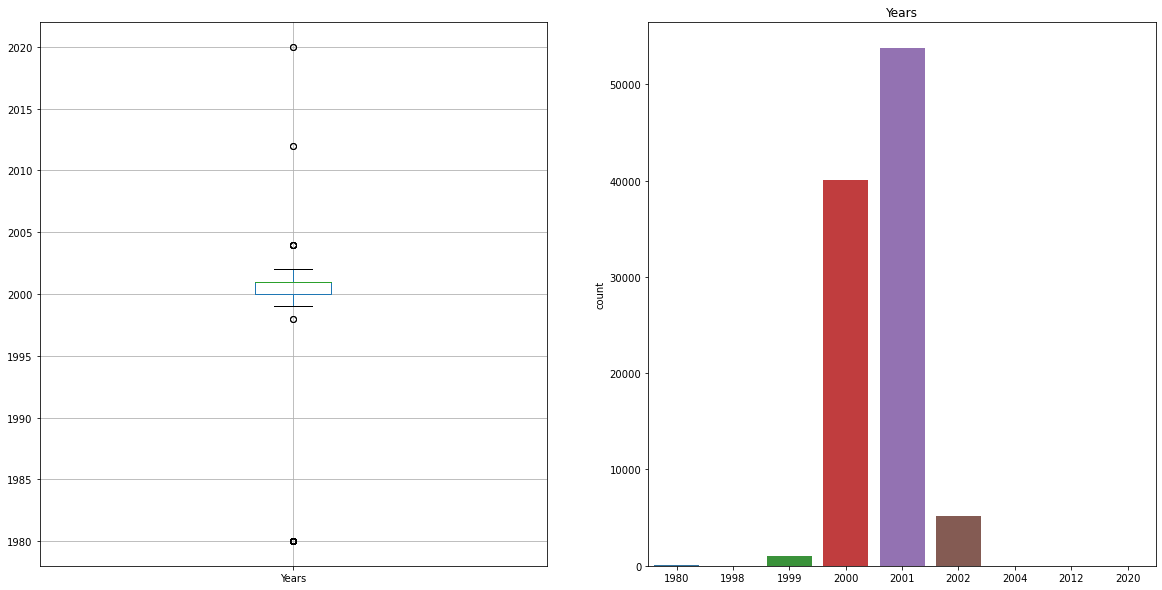

In [10]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data.boxplot(column=['Years'], ax=ax[0])

sns.countplot(x='Years',data=data,ax=ax[1])
ax[1].set_title('Years')
ax[1].set_xlabel('')


<h4>b - Month.</h4>

In [11]:
data['Month'] = data['Date'].apply(lambda x:  int(x.split('-' )[1]))

In [12]:
print(look_values(data,'Month'))
print(data.Month.describe())

Unique value of Month: 12
count    100000.000000
mean          7.231930
std           3.623966
min           1.000000
25%           4.000000
50%           8.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64


Text(0.5, 0, '')

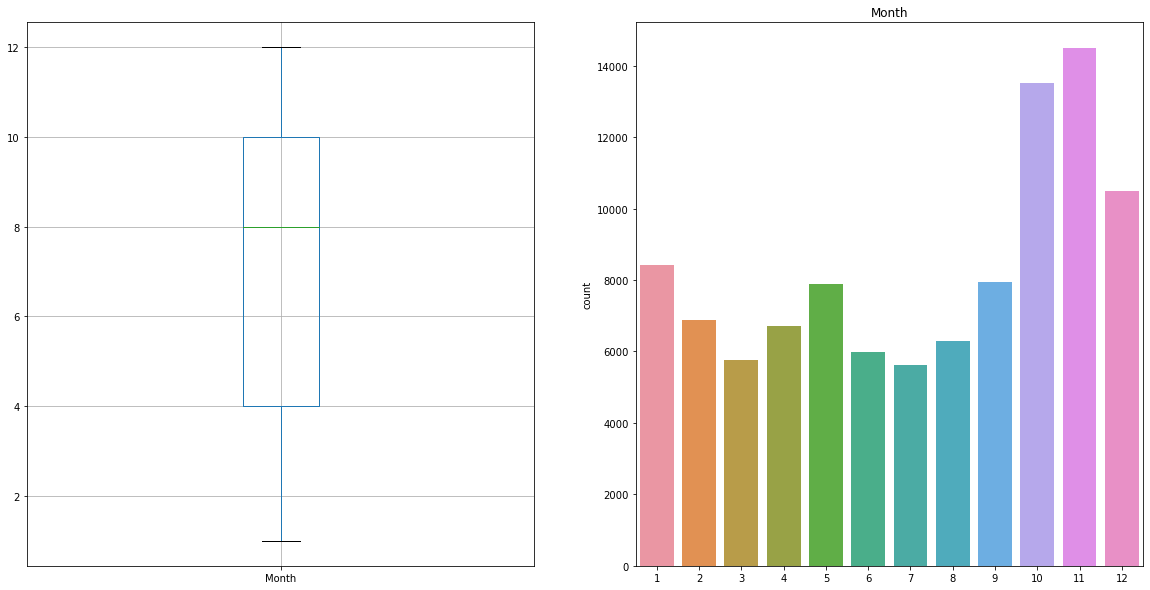

In [13]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data.boxplot(column=['Month'], ax=ax[0])
sns.countplot(x='Month',data=data,ax=ax[1])
ax[1].set_title('Month')
ax[1].set_xlabel('')

<h4> c - Day. </h4>


In [14]:
data['Day'] = data['Date'].apply(lambda x:  int((x.split('-' )[2]).split(' ')[0]))

In [15]:
print(look_values(data,'Day'))
data['Day'].describe()

Unique value of Day: 31


count    100000.000000
mean         16.140620
std           8.705156
min           1.000000
25%           9.000000
50%          16.000000
75%          24.000000
max          31.000000
Name: Day, dtype: float64

Text(0.5, 0, '')

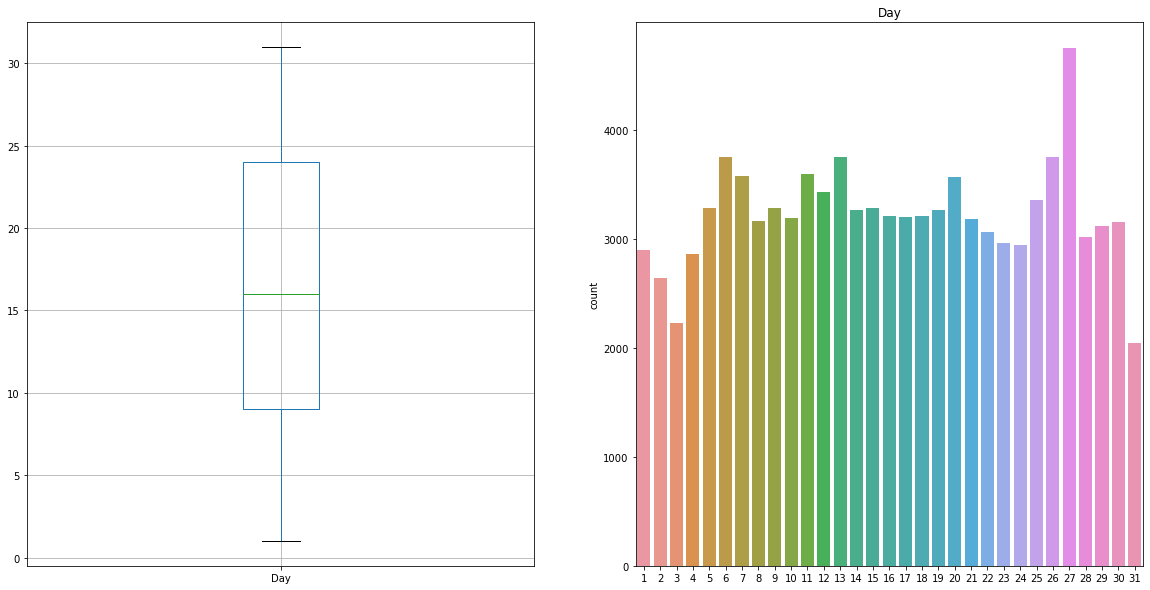

In [16]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data.boxplot(column=['Day'], ax=ax[0])


sns.countplot(x='Day', data=data, ax=ax[1])
ax[1].set_title('Day')
ax[1].set_xlabel('')


<h4> d - Hours. </h4>

In [17]:
data['Hours'] = data['Date'].apply(lambda x:  int(((x.split('-' )[2]).split(' ')[1]).split(':')[0]))

In [18]:
print(look_values(data,'Hours'))
data['Hours'].describe()

Unique value of Hours: 24


count    100000.000000
mean         13.947990
std           5.107395
min           0.000000
25%          11.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: Hours, dtype: float64

Text(0.5, 0, '')

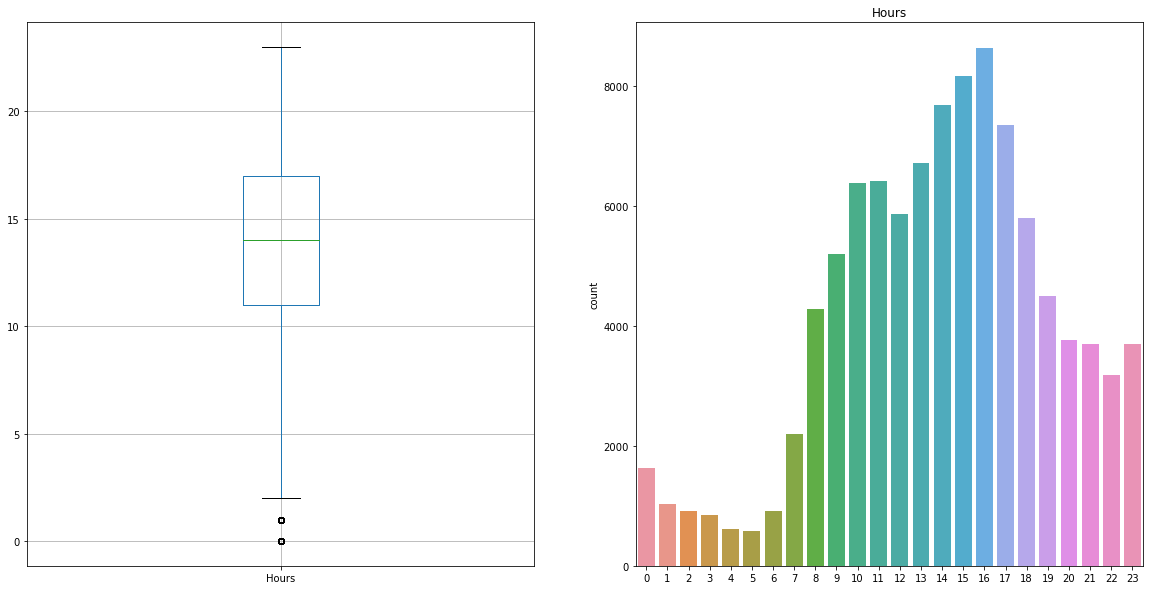

In [19]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data.boxplot(column=['Hours'], ax=ax[0])

sns.countplot(x='Hours', data=data, ax=ax[1])
ax[1].set_title('Hours')
ax[1].set_xlabel('')



<h4>c - Week day.</h4>

On récupère les jours de la semaine 0 -> lundi ... 6 -> dimanche.

In [20]:
dt_series = pd.to_datetime(data['Date'], format="%Y/%m/%d")

dow = []
for dt in range(0, len(data)):
    dow.append(dt_series[dt].weekday())

data.insert(1, 'DayWeek', dow)

In [21]:
print(look_values(data,'DayWeek'))
data['DayWeek'].describe()

Unique value of DayWeek: 7


count    100000.000000
mean          2.096180
std           1.532669
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: DayWeek, dtype: float64

Text(0.5, 0, '')

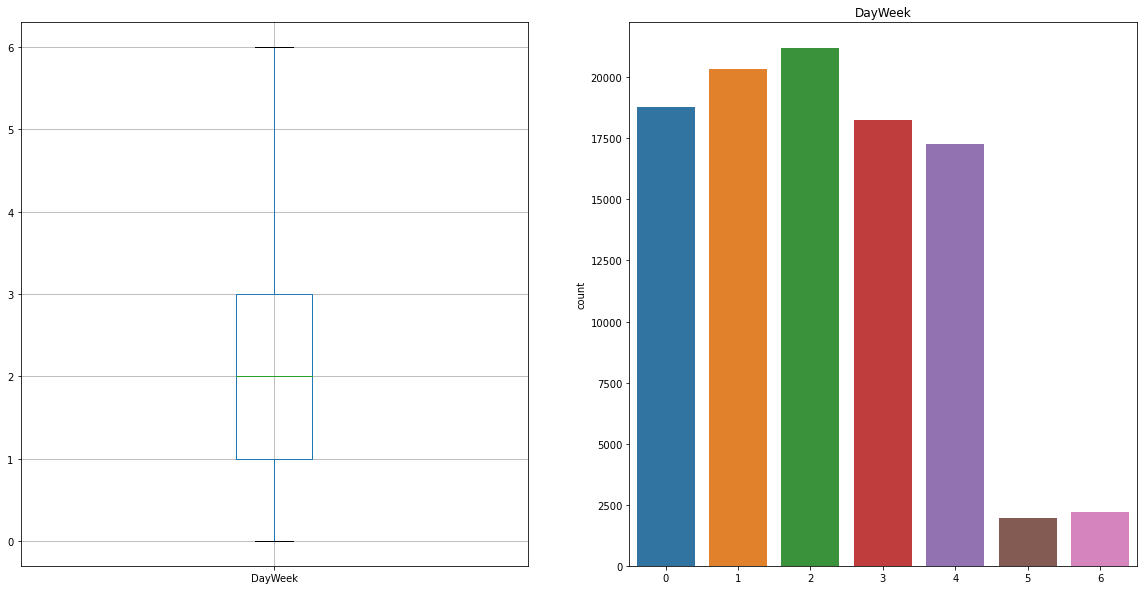

In [22]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data.boxplot(column=['DayWeek'], ax=ax[0])

sns.countplot(x='DayWeek', data=data, ax=ax[1])
ax[1].set_title('DayWeek')
ax[1].set_xlabel('')



In [23]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [24]:
data['content'].isna().sum()

402

In [25]:
data["content"].fillna("No Content", inplace = True) 

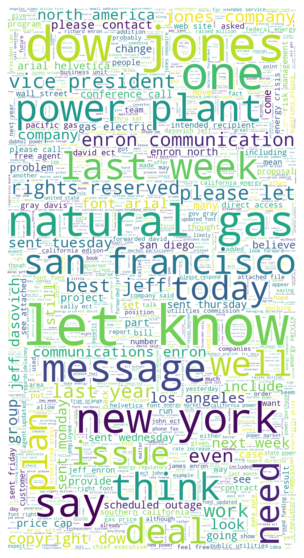

In [26]:
words = " ".join(data['content'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    word_uninterested = ['subject', 'content', 'image', 'etc']
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if (w not in stop_words) and w.isalpha() and (w.lower() not in word_uninterested) and (len(w)>2):
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 39000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()


<br>
On compter le nombre de mots des mails 
:

In [27]:
import string 

data['content'][2]
sum([i.strip(string.punctuation).isalpha() for i in data['content'][2].split()])

5

In [28]:
data['content_char_len'] = data['content'].apply(lambda x: len(x)  if (type(x)==type('str')) else 0)

In [29]:
print(data['content_char_len'].describe())


count    100000.000000
mean       2158.971240
std        7370.232522
min           1.000000
25%         272.000000
50%         758.000000
75%        1854.000000
max      260461.000000
Name: content_char_len, dtype: float64


In [30]:
data['content_char_len'].quantile(0.90)

content_char_length_q1 = data['content_char_len'].quantile(0.25)
content_char_length_q2 = data['content_char_len'].quantile(0.75)


In [31]:
data['content_char_length_category'] = data['content_char_len'].apply(lambda x: 1 if x<content_char_length_q1 else (2 if x<content_char_length_q2 else 3))

Text(0.5, 0, 'content_char_length_category')

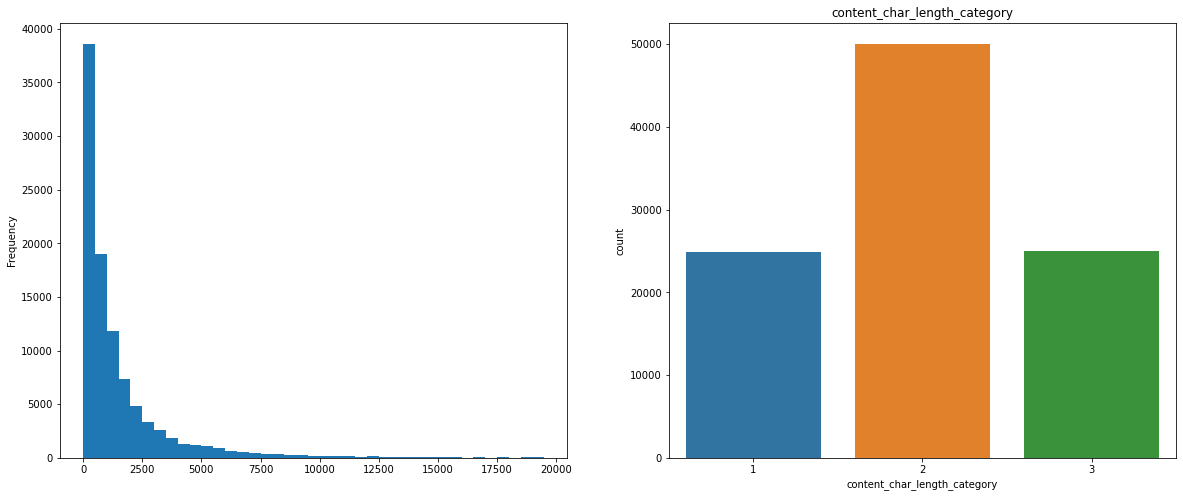

In [32]:
f,ax = plt.subplots(1,2,figsize=(20,8))

data.content_char_len.plot.hist(bins=range(0,20000,500),ax=ax[0])

sns.countplot(x='content_char_length_category', data=data, ax=ax[1])
ax[1].set_title('content_char_length_category')
ax[1].set_xlabel('content_char_length_category')




<br>
Creation d'une colonne nombre de mots

In [33]:
data['content_word_len'] = data['content'].apply(lambda x: sum([i.strip(string.punctuation).isalpha() for i in x.split()])  if (type(x)==type('str')) else 0)

In [34]:
print(data['content_word_len'].quantile(0.95))

content_word_length_q1 = data['content_word_len'].quantile(0.25)
content_word_length_q2 = data['content_word_len'].quantile(0.75)

929.0


In [35]:
data['content_word_length_category'] = data['content_word_len'].apply(lambda x: 1 if x<content_word_length_q1 else (2 if x<content_word_length_q2 else 3))

Text(0.5, 0, 'content_word_length_category')

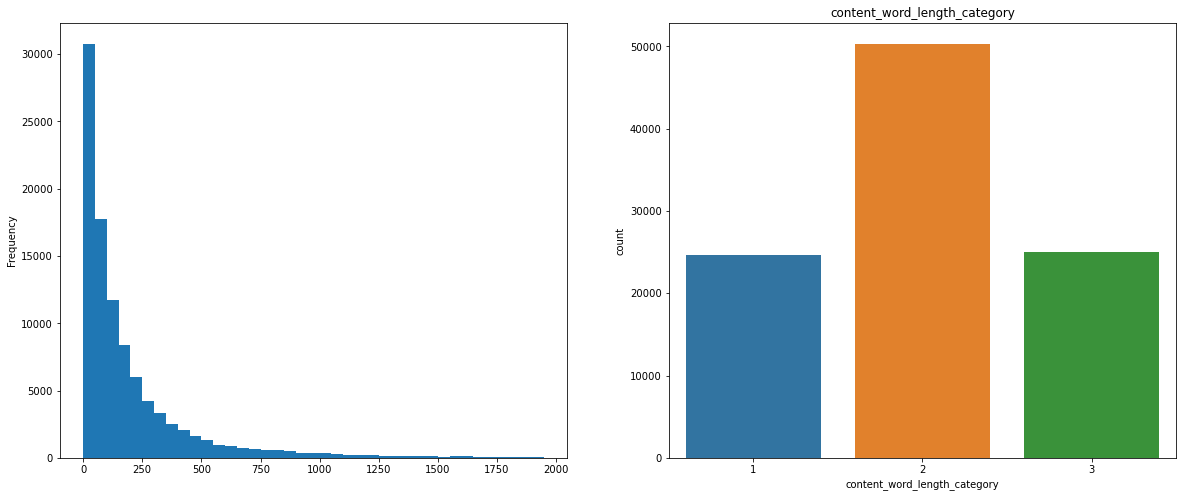

In [36]:
f,ax = plt.subplots(1,2,figsize=(20,8))


data.content_word_len.plot.hist(bins=range(0,2000,50), ax=ax[0])


sns.countplot(x='content_word_length_category', data=data, ax=ax[1])
ax[1].set_title('content_word_length_category')
ax[1].set_xlabel('content_word_length_category')

<br>
Replace na value.

In [60]:
def look_values_possible(column):
    return(column.unique())

for i in range(15, 46):
    data.iloc[:, i] = data.iloc[:, i].apply(lambda x: -1 if ((type(x) != type('str'))) else x)


In [89]:
data['X-FileName'] = data['X-FileName'].apply(lambda x: 'No File Name' if ((type(x) != type('str'))) else x )
data['X-bcc'] = data['X-bcc'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-cc'] = data['X-cc'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-To'] = data['X-To'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-From'] = data['X-From'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['Subject'] = data['Subject'].apply(lambda x: 'No subject' if ((type(x) != type('str'))) else x )
data['To'] = data['To'].apply(lambda x: 'No one' if ((type(x) != type('str'))) else x )
data['X-Folder'] = data['X-Folder'].apply(lambda x: 'No X-Folder' if ((type(x) != type('str'))) else x )
data['X-Origin'] = data['X-Origin'].apply(lambda x: 'No X-Origin' if ((type(x) != type('str'))) else x )

In [92]:
data.isna().sum()


Unnamed: 0                      0
DayWeek                         0
Message-ID                      0
Date                            0
From                            0
To                              0
Subject                         0
X-From                          0
X-To                            0
X-cc                            0
X-bcc                           0
X-Folder                        0
X-Origin                        0
X-FileName                      0
content                         0
user                            0
Cat_1_level_1                   0
Cat_1_level_2                   0
Cat_1_weight                    0
Cat_2_level_1                   0
Cat_2_level_2                   0
Cat_2_weight                    0
Cat_3_level_1                   0
Cat_3_level_2                   0
Cat_3_weight                    0
Cat_4_level_1                   0
Cat_4_level_2                   0
Cat_4_weight                    0
Cat_5_level_1                   0
Cat_5_level_2 

In [94]:
data.to_csv('/Users/lucas/Desktop/Polytech/IG4/S7/projet_DS/mail_clean.csv')